# Where in the Genome Does DNA Replication Begin?

[Here](https://stepic.org/s/BrqnabRZ) is a link to the interactive text.

`genome` stores the genome of *Vibrio cholerae*, which is 1,108,250 nucleotides long.

In [1]:
genome = readdlm("data/Vibrio_cholerae.txt")[1,1]
length(genome)

1108250

## Code Challenge (1.2 - Step 6)
* **Input**: Strings `text` and `pattern`.
* **Output**: How many times `pattern` appears in `text`.

In [2]:
function pattern_count(text, pattern)
    count = 0
    for i = 1:(length(text) - length(pattern) + 1)
        if text[i:(i + length(pattern) - 1)] == pattern
            count += 1
        end
    end
    return count
end

pattern_count (generic function with 1 method)

In [3]:
data = readdlm("data/dataset_2_6.txt")
pattern_count(data[1], data[2])

32

##Code Challenge (1.2 - Step 9)
* **Input**: A string `text` and an integer $k$.
* **Output**: All of the most frequent $k$-mers in `text`.

In [4]:
function frequent_words(text, k)
    frequentPatterns = Set()
    count = Array{Int64}(length(text) - k + 1)
    for i = 1:(length(text) - k + 1)
        pattern = text[i:(i+k-1)]
        count[i] = pattern_count(text, pattern)
    end
    maxCount = maximum(count)
    for i = 1:(length(text) - k + 1)
        if count[i] == maxCount
            push!(frequentPatterns, text[i:(i+k-1)])
        end
    end
    return frequentPatterns
end     

frequent_words (generic function with 1 method)

In [5]:
data = readdlm("data/dataset_2_9.txt")
frequent_words(data[1], data[2])

Set(Any["CAGCATAGACAT"])

##Charging Station - Pattern to Number and Back
* **Input**: A DNA string `pattern`.
* **Output**: The integer corresponding to the index of `pattern` (0-indexed) if all DNA strings of the same length as `pattern`  were ordered lexicographically. Equivalent to conversion from base-4 to decimal.

In [6]:
function pattern_to_number(pattern)
    if pattern == ""
        return 0
    else
        symbol = last(pattern)
        prefix = pattern[1:(length(pattern)-1)]
        return 4 * pattern_to_number(prefix) + symbol_to_number(symbol)
    end
end

pattern_to_number (generic function with 1 method)

* **Input**: A DNA char `symbol`.
* **Output**: 0, 1, 2, or 3 for 'A','C','G', or 'T', respectively.

In [7]:
function symbol_to_number(symbol)
    dict = Dict('A' => 0, 'C' => 1, 'G' => 2, 'T' => 3)
    return dict[symbol]
end

symbol_to_number (generic function with 1 method)

In [8]:
data = readdlm("data/dataset_3010_2.txt")[1]
pattern_to_number(data)

253165471356

* **Input**: Integers `index` and $k$.
* **Output**: The DNA $k$-mer corresponding to `index`.

In [9]:
function number_to_pattern(index, k)
    if k == 1
        return number_to_symbol(index)
    else
        prefixIndex = div(index, 4)
        r = rem(index, 4)
        symbol = number_to_symbol(r)
        prefixPattern = number_to_pattern(prefixIndex, k-1)
        return string(prefixPattern, symbol)
    end
end

number_to_pattern (generic function with 1 method)

* **Input**: An integer $k$.
* **Output**: The DNA nucleotide corresponding to $k$.

In [10]:
function number_to_symbol(k)
    dict = Dict(0 => 'A', 1 => 'C', 2 => 'G', 3 => 'T')
    return dict[k]
end

number_to_symbol (generic function with 1 method)

In [11]:
data = readdlm("data/dataset_3010_4.txt")
number_to_pattern(data[1], data[2])

"AAACCGTCTT"

## Charging Station - The Frequency Array
* **Input**: A DNA string `text` and an integer $k$ representing the length of the patterns in `text`.
* **Output**: The [frequency array](https://stepic.org/s/r436d31P).

In [12]:
function computing_frequencies(text, k)
    frequencyArray = Array{Int64}(4^k)
    for i = 1:4^k
        frequencyArray[i] = 0
    end
    for i = 1:(length(text) - k + 1)
        pattern = text[i:(i+k-1)]
        j = pattern_to_number(pattern)
        frequencyArray[j+1] = frequencyArray[j+1] + 1
    end
    return frequencyArray
end

computing_frequencies (generic function with 1 method)

In [13]:
data = readdlm("data/dataset_2994_5.txt")
output = computing_frequencies(data[1], Int(data[2]))
writedlm("data/output.txt", output)

* **Input**: A string `text` and an integer $k$.
* **Output**: All of the most frequent $k$-mers in `text`.

In [14]:
function faster_frequent_words(text, k)
    frequentPatterns = Set()
    frequencyArray = computing_frequencies(text, k)
    maxCount = maximum(frequencyArray)
    for i = 1:4^k
        if frequencyArray[i] == maxCount
            pattern = number_to_pattern(i-1, k)
            push!(frequentPatterns, pattern)
        end
    end
    return frequentPatterns
end

faster_frequent_words (generic function with 1 method)

## Application
Now we can finally use `faster_frequent_words` to find common $k$-mers in oriC. Maybe one of these is the *DnaA* Box.

In [17]:
oriC = readdlm("data/oriC.txt")[1]
faster_frequent_words(oriC, 9)

Set(Any["CTCTTGATC","TCTTGATCA","ATGATCAAG","CTTGATCAT"])

##Code Challenge (1.3 - Step 2)
* **Input**: A DNA string, $\text{pattern}$.
* **Output**: $\overline{\text{pattern}}$, the reverse complement of $\text{pattern}$.

In [75]:
function reverse_complement(pattern)
    dict = Dict('A' => 'T', 'T' => 'A', 'C' => 'G', 'G' => 'C')
    if length(pattern) == 1
        return dict[pattern[1]]
    else
        prefix = pattern[1:end-1]
        lastSymbol = last(pattern)
        return string(dict[lastSymbol], reverse_complement(prefix))
    end
end

reverse_complement (generic function with 1 method)

In [19]:
# long output; uncomment to view
# data = readdlm("data/dataset_3_2.txt")[1]
# reverse_complement(data)

## Code Challenge (1.3 - Step 5)
* **Input**: Two strings, `pattern` and `genome`.
* **Output**: A collection of integers specifying all starting positions where `pattern` appears as a substring of `genome` (0-indexed).

In [20]:
function pattern_match(pattern, genome)
    positions = []
    for i = 1:(length(genome) - length(pattern) + 1)
        if genome[i:i+length(pattern)-1] == pattern
            push!(positions, i-1)
        end
    end
    return positions
end

pattern_match (generic function with 1 method)

In [21]:
data = readdlm("data/dataset_3_5.txt")
output = pattern_match(data[1], data[2])
writedlm("data/output_3_5.txt", output)

## Application
Let's try running `pattern_match` on the *Vibrio cholerae* genome. Specifically, we'll be looking for instances of the 9-mer "CTTGATCAT" that we found earlier.

In [22]:
output = pattern_match("CTTGATCAT", genome)
writedlm("data/output_Vcholerae.txt", output)

## Code Challenge (1.4 - Step 5)
* **Input**: A string `genome`, and integers $k$, $L$, and $t$.
* **Output**: All distinct $k$-mers forming $(L,t)$-clumps in `genome`.

In [56]:
function find_clumps(genome, k, L, t)
    frequentPatterns = Set()
    clump = Array{Int64}(4^k)
    for i = 1:4^k
        clump[i] = 0
    end
    text = genome[1:L]
    frequencyArray = computing_frequencies(text, k)
    for i = 1:4^k
        if frequencyArray[i] >= t
            clump[i] = 1
        end   
    end
    for i = 2:(length(genome) - L + 1)
        firstPattern = genome[i-1:i-1+k-1]
        index = pattern_to_number(firstPattern)
        frequencyArray[index+1] = frequencyArray[index+1] - 1
        lastPattern = genome[i+L-k:i+L-1]
        index = pattern_to_number(lastPattern)
        frequencyArray[index+1] = frequencyArray[index+1] + 1
        if frequencyArray[index+1] >= t
            clump[index+1] = 1
        end
    end
    for i = 1:4^k
        if clump[i] == 1
            pattern = number_to_pattern(i-1, k)
            push!(frequentPatterns, pattern)
        end
    end
    return frequentPatterns
end

find_clumps (generic function with 1 method)

In [24]:
data = readdlm("data/dataset_4_5.txt")
find_clumps(data[1], data[2], data[4], data[6])

Set(Any["AGAACTCCA","ACGAAGAGC","AGGGACTGG","CAGATGCGG","CAGAATGAG","GAGGGACTG","ATAGTGCGA","GTCCCACGC","GGAGGGACT","AGTGTGCTT","TTCGGTAGT"])

## Application
Let's try using `find_clumps` to find 9-mers that form (500,3)-clumps in the *E. coli* genome. We print the number of different 9-mers.

In [84]:
data = readdlm("data/E-coli.txt")[1]
length(find_clumps(data, 9, 500, 3))

1904

## Code Challenge (2.3 - Step 6)
* **Input**: A DNA string `genome`.
* **Output**: All integer(s) $i$ minimizing $\text{skew}_i($ `genome` $)$ among all values of $i$.

In [51]:
function min_skew(genome)
    skew = gc_skew(genome)
    minSkew = minimum(skew)
    indices = Set()
    for i = 1:length(skew)
        if skew[i] == minSkew
            push!(indices, i-1)
        end
    end
    return indices
end

min_skew (generic function with 1 method)

In [52]:
function gc_skew(genome)
    skew = Array{Int64}(length(genome) + 1)
    skew[1] = 0
    for i = 1:length(genome)
        if genome[i] == 'C'
            skew[i+1] = skew[i] - 1
        elseif genome[i] == 'G'
            skew[i+1] = skew[i] + 1
        else
            skew[i+1] = skew[i]
        end
    end
    return skew
end

gc_skew (generic function with 1 method)

In [11]:
data = readdlm("data/dataset_7_6.txt")[1]
min_skew(data)

Set(Any[63,62,56])

## Visualizing Skew
We recreate the beautiful skew diagram of the *E. coli* genome below.

In [1]:
using Gadfly;

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.4/Cairo.ji for module Cairo.
INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.4/Gadfly.ji for module Gadfly.
INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.4/Compose.ji for module Compose.


In [14]:
genome = readdlm("data/E-coli.txt")[1]
position = 0:length(genome)
skew = gc_skew(genome);

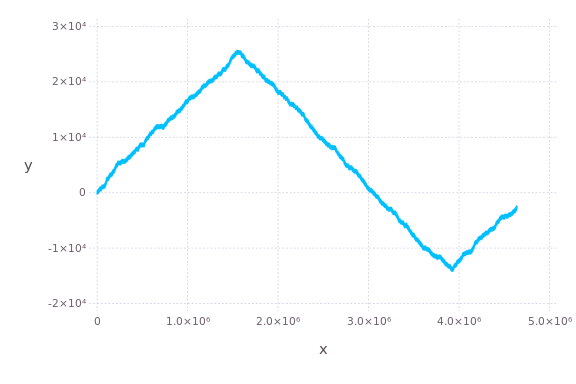

In [17]:
draw(PNG(6inch, 4inch), plot(x=position, y=skew, Geom.line))

## Code Challenge (2.4 - Step 3)
* **Input**: Two strings of equal length, `string1` and `string2`.
* **Output**: The Hamming distance between `string1` and `string2`.

In [71]:
function hamming(string1, string2)
    distance = 0
    for i = 1:length(string1)
        if string1[i] != string2[i]
            distance += 1
        end
    end
    return distance
end

hamming (generic function with 1 method)

In [15]:
data = readdlm("data/dataset_9_3.txt")
hamming(data[1], data[2])

785

## Code Challenge (2.4 - Step 4)
**Approximate Pattern Matching Problem**: *Find all approximate occurrences of a pattern in a string.*
* **Input**: Strings `pattern` and `text` along with an integer $d$.
* **output**: All starting positions where `pattern` appears as a substring of `text` with at most $d$ mismatches.

In [23]:
function approx_pattern_match(pattern, text, d)
    indices = Set()
    for i = 1:(length(text) - length(pattern) + 1)
        otherPattern = text[i:(i + length(pattern) - 1)]
        if hamming(pattern, otherPattern) <= d
            push!(indices, i-1)
        end
    end
    return indices
end

approx_pattern_match (generic function with 1 method)

In [25]:
data = readdlm("data/dataset_9_4.txt")
output = approx_pattern_match(data[1], data[2], data[3])
writedlm("data/output_9_4.txt", output)

## Code Challenge (2.4 - Step 6)
* **Input**: Strings `pattern` and `text` as well as an integer $d$.
* **Output**: $\text{count}_d($ `text`, `pattern` $)$.

In [73]:
function approx_pattern_count(pattern, text, d)
    count = 0
    for i = 1:(length(text) - length(pattern) + 1)
        otherPattern = text[i:(i + length(pattern) - 1)]
        if hamming(pattern, otherPattern) <= d
            count += 1
        end
    end
    return count
end

approx_pattern_count (generic function with 1 method)

In [33]:
data = readdlm("data/dataset_9_6.txt")
approx_pattern_count(data[1], data[2], data[3])

67

## Charging Station - Neighborhood of a String
* **Input**: A string `pattern` and an integer $d$.
* **Output**: The collection of strings that differ from `pattern` by no more than $d$ characters.

In [69]:
function neighbors(pattern, d)
    if d == 0
        return Set([pattern])
    end
    if length(pattern) == 1
        return Set(['A', 'C', 'G', 'T'])
    end
    neighborhood = Set{ASCIIString}()
    suffixNeighbors = neighbors(pattern[2:end], d)
    for text = suffixNeighbors
        if hamming(pattern[2:end], text) < d
            for x = Set(['A', 'C', 'G', 'T'])
                push!(neighborhood, string(x, text))
            end
        elseif hamming(pattern[2:end], text) == d
            push!(neighborhood, string(first(pattern), text))
        end
    end
    return collect(neighborhood)
end
            

neighbors (generic function with 1 method)

In [49]:
data = readdlm("data/dataset_3014_3.txt")
output = neighbors(data[1], data[2])
writedlm("data/output_3014_3.txt", output)

## Code Challenge (2.4 - Step 7)
**Frequent Words with Mismatches Problem**: *Find the most frequent $k$-mers with mismatches in a string.*
* **Input**: A string `text` as well as integers $k$ and $d$.
* **Output**: All most frequent $k$-mers with up to $d$ mismatches in `text`.

In [90]:
function frequent_words_with_mismatches(text, k, d)
    frequentPatterns = Set()
    closeArray = Array{Bool}(4^k)
    frequencyArray = Array{Int64}(4^k)
    for i = 1:4^k
        closeArray[i] = false
        frequencyArray[i] = 0
    end
    for i = 1:(length(text) - k + 1)
        neighborhood = neighbors(text[i:i+k-1], d)
        for pattern = neighborhood
            index = pattern_to_number(pattern)
            closeArray[index+1] = true
        end
    end
    for i = 1:4^k
        if closeArray[i]
            pattern = number_to_pattern(i-1, k)
            frequencyArray[i] = approx_pattern_count(pattern, text, d)
        end
    end
    maxCount = maximum(frequencyArray)
    for i = 1:4^k
        if frequencyArray[i] == maxCount
            pattern = number_to_pattern(i-1, k)
            push!(frequentPatterns, pattern)
        end
    end
    return frequentPatterns
end

frequent_words_with_mismatches (generic function with 1 method)

In [91]:
data = readdlm("data/dataset_9_7.txt")
output = frequent_words_with_mismatches(data[1], data[2], data[4])
writedlm("data/output_9_7.txt", output)

## Code Challenge (2.4 - Step 8)
**Frequent Words with Mismatches and Reverse Complements Problem**: *Find the most frequent $k$-mers (with mismatches and reverse complements) in a string.*
* **Input**: A DNA string `text` as well as integers $k$ and $d$.
* **Output**: All $k$-mers $\texttt{pattern}$ maximizing the sum $\text{count}_d(\texttt{text}, \texttt{pattern}) + \text{count}_d(\texttt{text}, \overline{\texttt{pattern}})$ over all possible $k$-mers.

In [67]:
function frequent_words_with_mismatches_complete(text, k, d)
    frequentPatterns = Set()
    closeArray = Array{Bool}(4^k)
    frequencyArray = Array{Int64}(4^k)
    for i = 1:4^k
        closeArray[i] = false
        frequencyArray[i] = 0
    end
    for i = 1:(length(text) - k + 1)
        neighborhood = neighbors(text[i:i+k-1], d)
        for pattern = neighborhood
            index = pattern_to_number(pattern)
            closeArray[index+1] = true
        end
    end
    for i = 1:4^k
        if closeArray[i]
            pattern = number_to_pattern(i-1, k)
            frequencyArray[i] = approx_pattern_count(pattern, text, d) + 
                approx_pattern_count(reverse_complement(pattern), text, d)
        end
    end
    maxCount = maximum(frequencyArray)
    for i = 1:4^k
        if frequencyArray[i] == maxCount
            pattern = number_to_pattern(i-1, k)
            push!(frequentPatterns, pattern)
        end
    end
    return frequentPatterns
end

frequent_words_with_mismatches_complete (generic function with 1 method)

In [99]:
data = readdlm("data/dataset_9_8.txt")
frequent_words_with_mismatches_complete(data[1], data[2], data[4])

Set(Any["TACTAGT","ACTAGTA"])

## Final Challenge
Find a *DnaA* box in *Salmonella enterica*.

We start by reading in the genome.

In [44]:
genome = readdlm("data/Salmonella_enterica.txt", skipstart=1)
genome = join(genome, "");

Next we generate the skew diagram and find the position at which minimum skew is attained.

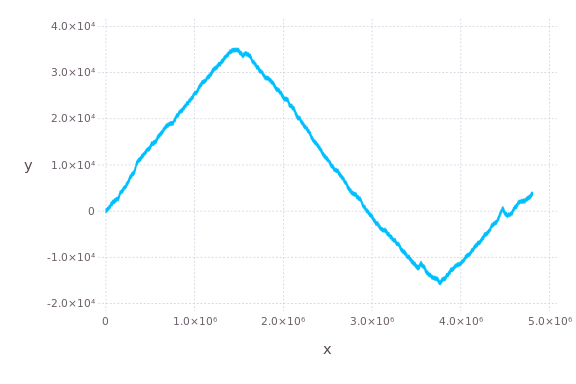

In [54]:
position = 0:length(genome)
skew = gc_skew(genome)
draw(PNG(6inch, 4inch), plot(x=position, y=skew, Geom.line))

In [55]:
min_skew(genome)

Set(Any[3764858,3764856])

There is clear minimum around position 3,764,857. Next we search for frequent words (with 1 mismatch and including reverse complements) in a window of length 1000 centered around the location of minimum skew.

In [77]:
center = 3764857
frequent_words_with_mismatches_complete(genome[center-500:center+500], 9, 1)

Set(Any["TTATCCACA","TGTGGATAA"])